In [45]:
import warnings
import numpy as np
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import networkx as nx
from functools import reduce
from operator import add

from sklearn.datasets import load_boston

warnings.filterwarnings('ignore')

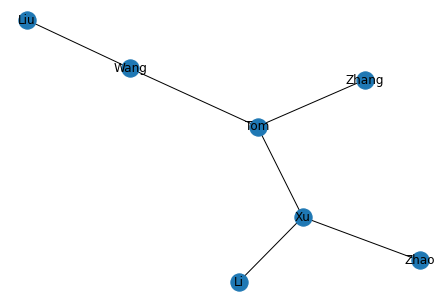

In [13]:
people_relatioship = {
    'Wang': ['Liu', 'Tom'],
    'Tom': ['Zhang', 'Xu'],
    'Xu': ['Zhao', 'Li']
}
nx.draw(nx.Graph(people_relatioship), with_labels=True, )

### 拓扑排序

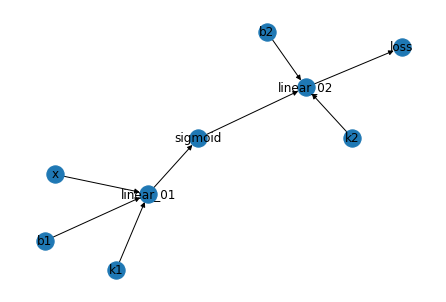

In [14]:
node_x, node_k1, node_b1 = 'x', 'k1', 'b1'
node_k2, node_b2 = 'k2', 'b2'
node_linear_01, node_linear_02, node_sigmoid = 'linear_01', 'linear_02', 'sigmoid'
node_loss = 'loss'

computing_graph = {
    node_x: [node_linear_01], 
    node_k1: [node_linear_01], 
    node_b1: [node_linear_01], 
    node_linear_01: [node_sigmoid], 
    node_sigmoid: [node_linear_02], 
    node_k2: [node_linear_02], 
    node_b2: [node_linear_02], 
    node_linear_02: [node_loss]
}

graph = nx.DiGraph(computing_graph)
layout = nx.layout.spring_layout(graph)
nx.draw(graph, layout, with_labels=True)

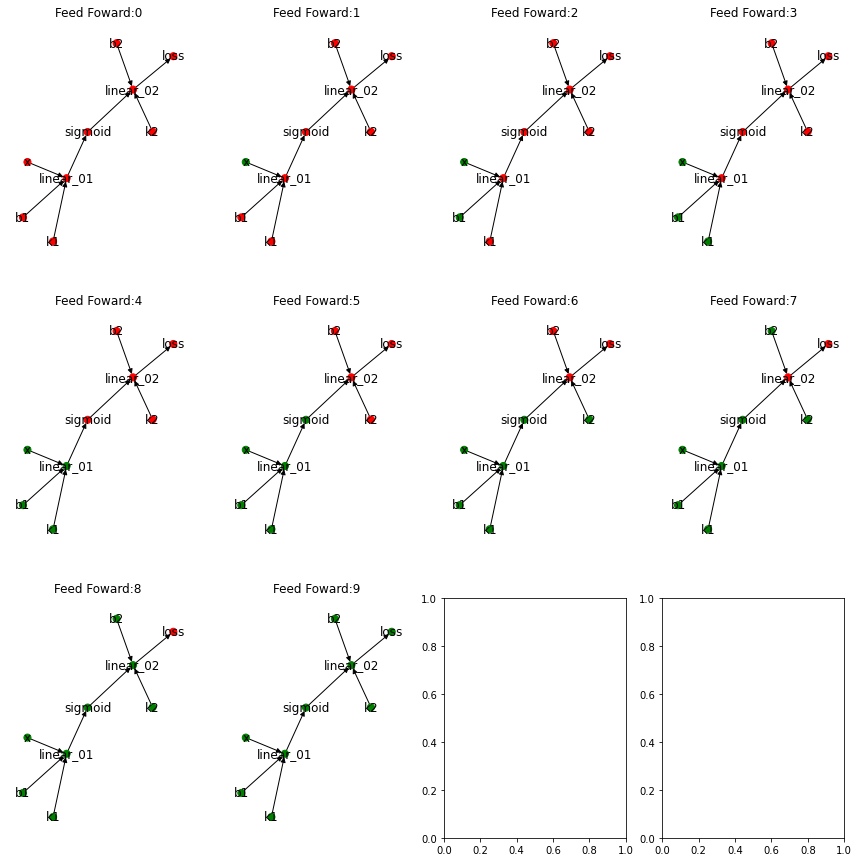

In [16]:
# 正向传播

visited_order = [node_x, node_b1, node_k1, node_linear_01, node_sigmoid, node_k2, node_b2, node_linear_02, node_loss]

def visited_procedure(graph, position, visited_order, step=None, 
                      sub_plot_index=None, colors=('red', 'green'), node_size=5):
    changed = visited_order[: step] if step is not None else visited_order
    before, after = colors
    color_map = [after if c in changed else before for c in graph]
    nx.draw(graph, position, node_color=color_map, with_labels=True, ax=sub_plot_index, node_size=node_size)
    

dimension = int(len(visited_order) ** 0.5)
fig, ax = plt.subplots(dimension, dimension + 1, figsize=(15, 15))
    
for step in range(len(visited_order) + 1):
    ix = np.unravel_index(step, ax.shape)
    plt.sca(ax[ix])
    ax[ix].title.set_text(f'Feed Foward:{step}')
    visited_procedure(graph, layout, visited_order, step, sub_plot_index=ax[ix], node_size=50)
    

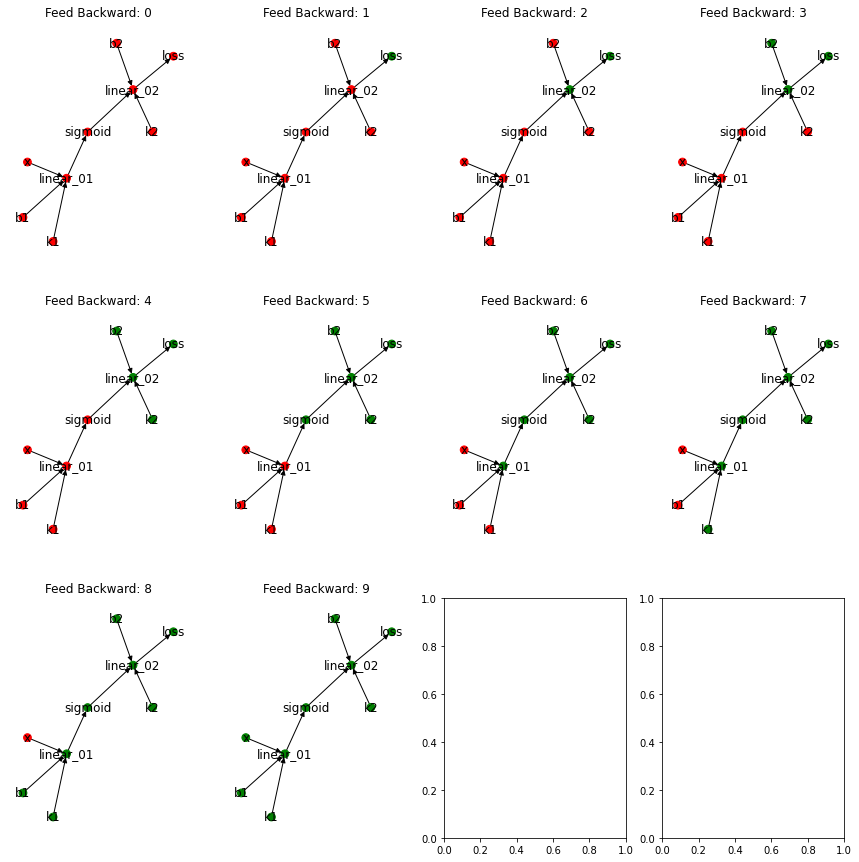

In [17]:
# 反向传播

fig, ax = plt.subplots(dimension, dimension + 1, figsize=(15, 15))

for step in range(len(visited_order) + 1):
    ix = np.unravel_index(step, ax.shape)
    plt.sca(ax[ix])
    ax[ix].title.set_text(f'Feed Backward: {step}')
    visited_procedure(graph, layout, visited_order[::-1], step, sub_plot_index=ax[ix], node_size=60)

In [37]:
node_linear_01 = 'linear_01'
node_linear_02 = 'linear_02'
node_linear_03 = 'linear_03'
node_linear_04 = 'linear_04'
node_linear_05 = 'linear_05'
node_linear_06 = 'linear_06'

node_k1, node_b1 = 'k1', 'b1'
node_k2, node_b2 = 'k2', 'b2'
node_k3, node_b3 = 'k3', 'b3'
node_k4, node_b4 = 'k4', 'b4'
node_k5, node_b5 = 'k5', 'b5'
node_k6, node_b6 = 'k6', 'b6'

node_sigmoid_01 = 'sigmoid-01'
node_sigmoid_02 = 'sigmoid-02'
node_sigmoid_03 = 'sigmoid-03'
node_sigmoid_04 = 'sigmoid-04'

computing_graph = { # represent model 
    node_x: [node_linear_01],
    node_k1: [node_linear_01],
    node_b1: [node_linear_01],
    
    node_x: [node_linear_02],
    node_k2:[node_linear_02],
    node_b2:[node_linear_03],
    
    node_linear_01: [node_sigmoid_01, node_sigmoid_02],
    node_linear_02: [node_sigmoid_03, node_sigmoid_04],

    node_sigmoid_01: [node_linear_04],
    node_sigmoid_02: [node_linear_03],
    node_sigmoid_03: [node_linear_05],
    node_sigmoid_04: [node_linear_06],
    
    node_linear_03: [node_loss],
    node_linear_04: [node_loss],
    node_linear_05: [node_loss],
    node_linear_06: [node_loss],
    
}

more_complicated_graph = nx.DiGraph(computing_graph)
more_complicated_layout = nx.layout.spring_layout(more_complicated_graph)

set(list(computing_graph.keys()))- set(reduce(add, list(computing_graph.values())))

{'b1', 'b2', 'k1', 'k2', 'x'}

In [38]:
# 拓扑排序
def topological_sort(graph):
    tmp_graph = graph.copy()
    sorted_node = []
    while len(tmp_graph) > 0:
        all_outputs = set(list(tmp_graph.keys()))
        all_inputs = set(reduce(add, list(tmp_graph.values())))
#         all_inputs = []
#         all_outputs = []
#         for n in tmp_graph:
#             all_inputs += tmp_graph[n]
#             all_outputs.append(n)
#         all_inputs = set(all_inputs)
#         all_outputs = set(all_outputs)
        
        need_remove = all_outputs - all_inputs

        if len(need_remove) > 0:
            node = random.choice(list(need_remove))
            visited_next = [node]
            
            if len(tmp_graph) == 1: visited_next += tmp_graph[node]
            tmp_graph.pop(node)
            
            sorted_node += visited_next
            
            for links in tmp_graph.values():
                if node in links: links.remove(node)
        else:
            break
    return sorted_node

topological_sort(computing_graph)

['k2',
 'b2',
 'b1',
 'x',
 'linear_02',
 'sigmoid-04',
 'sigmoid-03',
 'k1',
 'linear_01',
 'linear_05',
 'linear_06',
 'sigmoid-01',
 'sigmoid-02',
 'linear_04',
 'linear_03',
 'loss']

['k1', 'b1', 'linear_01', 'sigmoid-01', 'k2', 'sigmoid-02', 'x', 'b2', 'linear_02', 'sigmoid-03', 'linear_05', 'linear_03', 'sigmoid-04', 'linear_04', 'linear_06', 'loss']


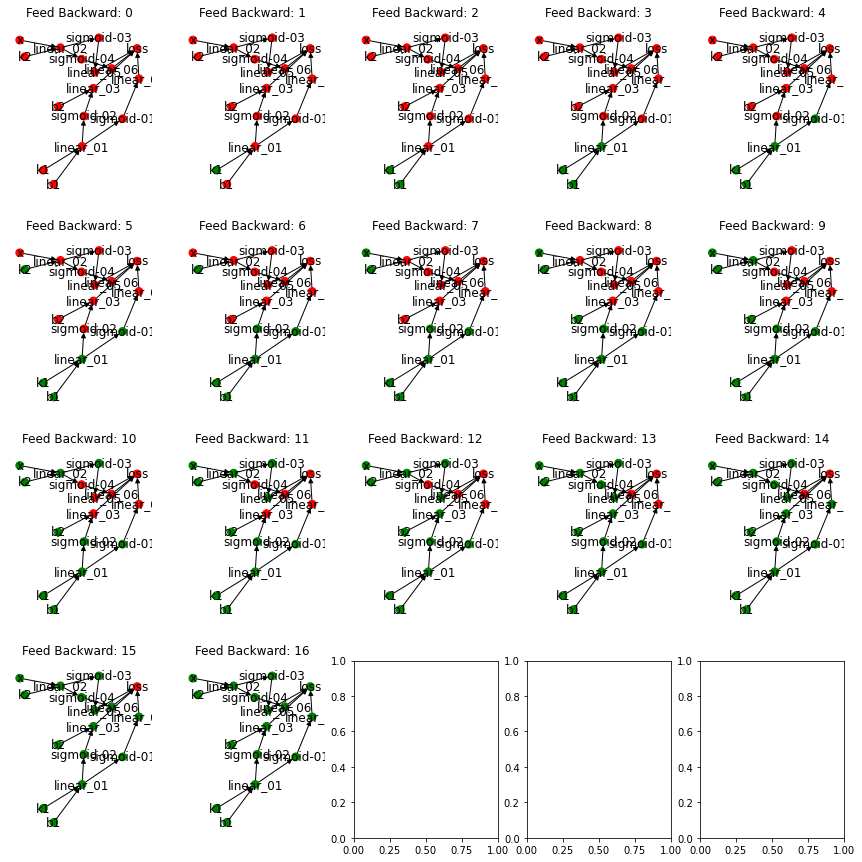

In [39]:
def draw_topological_sort(computing_graph, graph, layout):
    visited_order = topological_sort(computing_graph)
    print(visited_order)
    
    dimension = int(len(visited_order) ** 0.5)
    fig, ax = plt.subplots(dimension, dimension + 1, figsize=(15, 15))

    for step in range(len(visited_order) + 1):
        ix = np.unravel_index(step, ax.shape)
        plt.sca(ax[ix])
        ax[ix].title.set_text(f'Feed Backward: {step}')
        visited_procedure(graph, layout, visited_order, step, sub_plot_index=ax[ix], node_size=60)

draw_topological_sort(computing_graph, more_complicated_graph, more_complicated_layout)

In [127]:
class Node:
    def __init__(self, inputs=[], name=None, is_trainable=True):
        self.inputs = inputs
        self.outputs = []
        self.name = name
        self.is_trainable = is_trainable
        self.value = None
        self.gradients = {}
        # key are the inputs to this node, 
        # and their values are the partials of this node with respect to that input.
        # $\partial{node}{input_i}$
        # $\frac{\partial{node}}{\partial{input_i}}$
        
        for n in self.inputs:
            # set 'self' node as inbound_nodes's outbound_nodes
            n.outputs.append(self)
    
    def forward(self): 
        '''
        Forward propagation.
        Compute the output value based on 'inbound_nodes' and store the result in self.value
        '''
        raise NotImplemented
    
    def backward(self):
        raise NotImplemented
    
    def __repr__(self):
        return self.name

In [142]:
class Placeholder(Node):
    def __init__(self, name=None, is_trainable=True):
        Node.__init__(self, name=name, is_trainable=is_trainable)
        
    def forward(self, value=None):
        if value: self.value = value
    
    def backward(self):
        self.gradients = {self: 0}
        for out in self.outputs:
            self.gradients[self] = out.gradients[self] * 1


class Linear(Node):
    def __init__(self, X=None, weight=None, bias=None, name=None, is_trainable=False):
        Node.__init__(self, inputs=[X, weight, bias], name=name, is_trainable=is_trainable)
    
    def forward(self):
        X = self.inputs[0].value
        k = self.inputs[1].value
        b = self.inputs[2].value
        self.value = np.dot(X, k) + b
    
    def backward(self):
        self.gradients = {n: np.zeros_like(n.value) for n in self.inputs}
        for out in self.outputs:
            grad_cost = out.gradients[self]
            self.gradients[self.inputs[0]] = np.dot(grad_cost, self.inputs[1].value.T)
            self.gradients[self.inputs[1]] = np.dot(self.inputs[0].value.T, grad_cost)
            self.gradients[self.inputs[2]] = np.sum(grad_cost, axis=0, keepdims=False)


class Sigmoid(Node):
    def __init__(self, X, name=None, is_trainable=False):
        Node.__init__(self, [X], name=name, is_trainable=is_trainable)
    
    def _sigmoid(self, x):
        return 1. / (1 + np.exp(-1 * x))
    
    def forward(self):
        self.X = self.inputs[0]
        self.value = self._sigmoid(self.X.value)
    
    def _partial(self, X):
        return self._sigmoid(X) * (1 - self._sigmoid(X))
    
    def backward(self):
        self.gradients = {n: np.zeros_like(n.value) for n in self.inputs}
        self.partial = self._partial(self.X.value)
        for out in self.outputs:
            grad_cost = out.gradients[self]
            self.gradients[self.X] = grad_cost * self.partial


class Relu(Node):
    def __init__(self, X, name=None, is_trainable=False):
        Node.__init__(self, [X], name=name, is_trainable=is_trainable)
        self.X = X
    
    def forward(self):
        self.value = max(0, self.X.value)
#         self.value = self.X.value * (self.X.value > 0)
        
    def backward(self):
        for out in self.outputs:
            grad_cost = out.gradients[self]
            self.gradients[self.X] = max(0, grad_cost)
            # self.gradients[self.X] = grad_cost * (self.X.value > 0)
            
            
class MSE(Node):
    def __init__(self, y_true, y_pred, name=None, is_trainable=True):
        Node.__init__(self, inputs=[y_true, y_pred], name=name, is_trainable=is_trainable)
    def forward(self):
        y_true_value = self.inputs[0].value.reshape(-1, 1)
        y_pred_value = self.inputs[1].value.reshape(-1, 1)
        assert (y_true_value.shape == y_pred_value.shape)
        self.m = self.inputs[0].value.shape[0]
        self.diff = y_true_value - y_pred_value
        self.value = np.mean(self.diff ** 2)

    def backward(self):
        self.gradients[self.inputs[0]] = (2 / self.m) * self.diff
        self.gradients[self.inputs[1]] = (- 2 / self.m) * self.diff


In [149]:
def convert_feed_dict_to_graph(feed_dict):
    
    computing_grap = defaultdict(list)
    nodes = [n for n in feed_dict]
    while nodes:
        n = nodes.pop(0)
        if isinstance(n, Placeholder):
            n.value = feed_dict[n]
        if n in computing_grap: continue
        for m in n.outputs:
            computing_grap[n].append(m)
            nodes.append(m)
        
    return computing_grap

def topological_sort_feed_dict(feed_dict):
    return topological_sort(convert_feed_dict_to_graph(feed_dict))


def forward_and_backward(graph_order):
    for node in graph_order:
        node.forward()
    
    for node in graph_order[::-1]:
        node.backward()
        
def run_one_epoch(graph_order):
    forward_and_backward(graph_order)


def optimize(trainable, graph, learning_rate=1e-2):
    for t in trainable:
        t.value += -1 * learning_rate * t.gradients[t]


### 测试

In [191]:
from tqdm import tqdm_notebook

def predict_price_one_dimension(X_train, y_train, epoch=1000, batch_num=100, learning_rate=1e-2):
    X = Placeholder(name='X', is_trainable=False)
    y = Placeholder(name='y', is_trainable=False)
    w1, b1 = Placeholder(name='W1'), Placeholder(name='b1')
    w2, b2 = Placeholder(name='W2'), Placeholder(name='b2')
    output1 = Linear(X, w1, b1, name='linear-01')
    output2 = Sigmoid(output1, name='activation')
    y_pred = Linear(output2, w2, b2, name='y_pred')
    loss = MSE(y, y_pred, name='loss')

    feed_dict = {
        X: X_train, 
        y: y_train, 
        w1: np.random.normal(), 
        w2: np.random.normal(),
        b1: np.random.normal(), 
        b2: np.random.normal()
    }

    losses = []
    graph_sort = topological_sort_feed_dict(feed_dict)
    for e in tqdm_notebook(range(epoch)):
        loss = 0
        for batch in range(batch_num):
            index = np.random.choice(range(batch_num))
            X.value = X_train[index]
            y.value = y_train[index]
            run_one_epoch(graph_sort)
            optimize(graph_sort, learning_rate)
            loss += feed_dict
        losses.append(loss)
    return losses

In [192]:
data = load_boston()
X_, y_ = data.data, data.target
X_rm = X_[:, 5]

predict_price_one_dimension(X_rm, y_)


  0%|          | 0/1000 [00:00<?, ?it/s]

IndexError: tuple index out of range

In [189]:
data = load_boston()
X_, y_ = data['data'], data['target']
X_rm = X_[:, 5]

w1_, b1_ = np.random.normal(), np.random.normal()
w2_, b2_ = np.random.normal(), np.random.normal()
w3_, b3_ = np.random.normal(), np.random.normal()


X, y = Placeholder(name='X', is_trainable=False), Placeholder(name='y', is_trainable=False)
w1, b1 = Placeholder(name='w1'), Placeholder(name='b1')
w2, b2 = Placeholder(name='w2'), Placeholder(name='b2')

# build model
output1 = Linear(X, w1, b1, name='linear-01')
output2 = Sigmoid(output1, name='activation')
#output2 = Relu(output1, name='activation')
y_hat = Linear(output2, w2, b2, name='y_hat')
cost = MSE(y, y_hat, name='cost')

feed_dict = {
    X: X_rm,
    y: y_,
    w1: w1_,
    w2: w2_,
    b1: b1_,
    b2: b2_,
}

graph_sort = topological_sort_feed_dict(feed_dict)

epoch = 1000

batch_num = len(X_rm)

learning_rate = 1e-3

losses = []

for e in tqdm_notebook(range(epoch)):
    loss = 0
    
    for b in range(batch_num):
        index = np.random.choice(range(len(X_rm)))
        X.value = X_rm[index]
        y.value = y_[index]
    
        run_one_epoch(graph_sort)
    
        optimize(graph_sort, learning_rate)
        
        loss += cost.value

    losses.append(loss / batch_num)

  0%|          | 0/1000 [00:00<?, ?it/s]

IndexError: tuple index out of range

In [147]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample
#from miniflow import *

# Load data
data = load_boston()
X_ = data['data']
y_ = data['target']

# Normalize data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

n_features = X_.shape[1]
n_hidden = 10
W1_ = np.random.randn(n_features, n_hidden)
b1_ = np.zeros(n_hidden)
W2_ = np.random.randn(n_hidden, 1)
b2_ = np.zeros(1)

# Neural network
X, y = Placeholder(), Placeholder()
W1, b1 = Placeholder(), Placeholder()
W2, b2 = Placeholder(), Placeholder()

l1 = Linear(X, W1, b1)
s1 = Sigmoid(l1)
l2 = Linear(s1, W2, b2)
cost = MSE(y, l2)

feed_dict = {
    X: X_,
    y: y_,
    W1: W1_,
    b1: b1_,
    W2: W2_,
    b2: b2_
}

epochs = 5000
# Total number of examples
m = X_.shape[0]
batch_size = 16
steps_per_epoch = m // batch_size

graph = topological_sort_feed_dict(feed_dict)
trainables = [W1, b1, W2, b2]

print("Total number of examples = {}".format(m))

Total number of examples = 506


In [150]:
losses = []

for i in range(epochs):
    loss = 0
    for j in range(steps_per_epoch):
        # Step 1
        # Randomly sample a batch of examples
        X_batch, y_batch = resample(X_, y_, n_samples=batch_size)

        # Reset value of X and y Inputs
        X.value = X_batch
        y.value = y_batch

        # Step 2
        _ = None
        forward_and_backward(graph) # set output node not important.

        # Step 3
        rate = 1e-2
    
        optimize(trainables, rate)

        loss += graph[-1].value
    
    if i % 100 == 0: 
        print("Epoch: {}, Loss: {:.3f}".format(i+1, loss/steps_per_epoch))
        losses.append(loss/steps_per_epoch)

Epoch: 1, Loss: 187.017
Epoch: 101, Loss: 6.087
Epoch: 201, Loss: 6.065
Epoch: 301, Loss: 6.307
Epoch: 401, Loss: 4.864
Epoch: 501, Loss: 5.291
Epoch: 601, Loss: 4.242
Epoch: 701, Loss: 4.132
Epoch: 801, Loss: 3.626
Epoch: 901, Loss: 3.761
Epoch: 1001, Loss: 4.138
Epoch: 1101, Loss: 3.921
Epoch: 1201, Loss: 3.313
Epoch: 1301, Loss: 3.675
Epoch: 1401, Loss: 3.244
Epoch: 1501, Loss: 4.077
Epoch: 1601, Loss: 3.449
Epoch: 1701, Loss: 3.244
Epoch: 1801, Loss: 3.212
Epoch: 1901, Loss: 3.577
Epoch: 2001, Loss: 3.487
Epoch: 2101, Loss: 3.538
Epoch: 2201, Loss: 3.255
Epoch: 2301, Loss: 3.605
Epoch: 2401, Loss: 3.080
Epoch: 2501, Loss: 4.503
Epoch: 2601, Loss: 3.267
Epoch: 2701, Loss: 3.201
Epoch: 2801, Loss: 3.286
Epoch: 2901, Loss: 3.730
Epoch: 3001, Loss: 3.486
Epoch: 3101, Loss: 3.738
Epoch: 3201, Loss: 3.350
Epoch: 3301, Loss: 3.334
Epoch: 3401, Loss: 3.930
Epoch: 3501, Loss: 3.300
Epoch: 3601, Loss: 3.670
Epoch: 3701, Loss: 3.538
Epoch: 3801, Loss: 3.565
Epoch: 3901, Loss: 3.159
Epoch: 400

In [173]:
import pandas as pd

dataframe = pd.DataFrame(data['data'])
dataframe.columns = data['feature_names']
training_data = dataframe[['RM', 'LSTAT']]

import numpy as np
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample
#from miniflow import *

# Load data
data = load_boston()
X_ = training_data
y_ = data['target']

# Normalize data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

n_features = X_.shape[1]
n_hidden = 10
W1_ = np.random.randn(n_features, n_hidden)
b1_ = np.zeros(n_hidden)
W2_ = np.random.randn(n_hidden, 1)
b2_ = np.zeros(1)

# Neural network
X, y = Placeholder(), Placeholder()
W1, b1 = Placeholder(), Placeholder()
W2, b2 = Placeholder(), Placeholder()

l1 = Linear(X, W1, b1)
s1 = Sigmoid(l1)
l2 = Linear(s1, W2, b2)
cost = MSE(y, l2)

feed_dict = {
    X: X_,
    y: y_,
    W1: W1_,
    b1: b1_,
    W2: W2_,
    b2: b2_
}

epochs = 200
# Total number of examples
m = X_.shape[0]
batch_size = 1
steps_per_epoch = m // batch_size

graph = topological_sort_feed_dict(feed_dict)
trainables = [W1, b1, W2, b2]

print("Total number of examples = {}".format(m))

Total number of examples = 506


In [174]:
losses = []

for i in range(epochs):
    loss = 0
    for j in range(steps_per_epoch):
        # Step 1
        # Randomly sample a batch of examples
        X_batch, y_batch = resample(X_, y_, n_samples=batch_size)

        # Reset value of X and y Inputs
        X.value = X_batch
        y.value = y_batch

        # Step 2
    
        forward_and_backward(graph) # set output node not important.

        # Step 3
        rate = 1e-2
    
        optimize(trainables, rate)

        loss += graph[-1].value
    
    if i % 100 == 0: 
        print("Epoch: {}, Loss: {:.3f}".format(i+1, loss/steps_per_epoch))
        losses.append(loss/steps_per_epoch)

Epoch: 1, Loss: 37.564
Epoch: 101, Loss: 16.777


In [175]:
X.value = np.array([[6, 8]])
forward_and_backward(graph)
graph[-2].value[0][0]

17.662017255426193

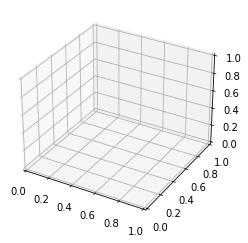

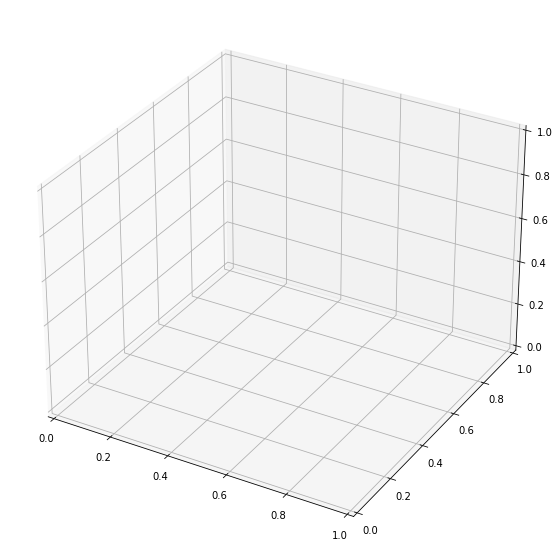

In [185]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# # Make data.
# X_ = X_[:, 0]
# Y_ = X_[:, 1]
# Z_ = y_

# # Plot the surface.
# rm_and_lstp_price = ax.scatter(X_, Y_, Z_)
# ax.set_xlabel('RM')
# ax.set_ylabel('% of lower state')
# ax.set_zlabel('Price')

In [186]:
predicate_result = []
for rm, ls in training_data.values:
    X.value = np.array([[rm, ls]])
    forward_and_backward(graph)
    predicate_result.append(graph[-2].value[0][0])

In [187]:
predicate_result = np.array(predicate_result)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

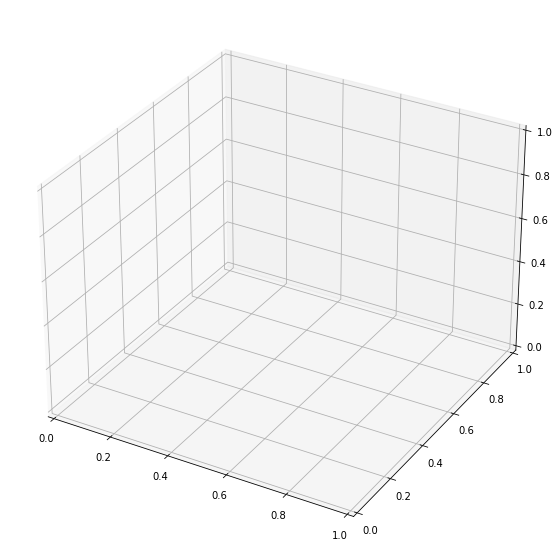

In [188]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Make data.
X = X_.values[:, 0]
Y = X_.values[:, 1]
Z = predicate_result

# Plot the surface.
rm_and_lstp_price = ax.plot_trisurf(X, Y, Z, color='yellow')

ax.set_xlabel('RM')
ax.set_ylabel('% of lower state')
ax.set_zlabel('Predicated-Price')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed